### Define Explore

In [83]:
import json
import os
# import rich
# from rich import print
import sys
import numpy as np
sys.path.append('../')

c1 = "England"
c2 = "Germany"
def get_country_value(file_path, c1="England", c2="Germany"):
    with open(file_path , 'r') as f:
        data = json.load(f)
    countries_value = {}
    upper_c1 = c1.upper()
    upper_c2 = c2.upper()
    c1_prediction_value = []
    c2_prediction_value = []
    for i in data:
        c1_prediction_value.append(i[c1][upper_c1][1])
        c2_prediction_value.append(i[c2][upper_c2][1])
            
    countries_value[c1] = {"pred": np.mean(c1_prediction_value)}
    countries_value[c2] = {"pred": np.mean(c2_prediction_value)}
    return countries_value

In [51]:
file_path = "countries_value_current_phase.json"
current_phase_value = get_country_value(file_path)
print(f"Current Phase Value: {current_phase_value}")

file_path = "countries_value_move_with_dialogue.json"
with_dialogue= get_country_value(file_path)
print(f"With Dialogue: {with_dialogue}")

file_path = "countries_value_move_without_dialogue.json"
without_dialogue = get_country_value(file_path)
print(f"Without Dialogue: {without_dialogue}")

file_path = "countries_value_move_without_movement.json"
without_movement = get_country_value(file_path)
print(f"Without Movement: {without_movement}")

file_path = "countries_value_previous_phase.json"
previous_phase = get_country_value(file_path)
print(f"Previous Phase: {previous_phase}")

Current Phase Value: {'England': {'pred': 0.1439727290456538}, 'Germany': {'pred': 0.17109545135106405}}

With Dialogue: {'England': {'pred': 0.12285933399016698}, 'Germany': {'pred': 0.14330532148124112}}

Without Dialogue: {'England': {'pred': 0.12335280293060312}, 'Germany': {'pred': 0.14537915220813907}}

Without Movement: {'England': {'pred': 0.1460116996755231}, 'Germany': {'pred': 0.17857720209829353}}

Previous Phase: {'England': {'pred': 0.1460116996755231}, 'Germany': {'pred': 0.17857720209829353}}

### Countries Plot

In [52]:
def get_countries_predict_list(file_path, c1="England", c2="Germany"):
    with open(file_path , 'r') as f:
        data = json.load(f)
    countries_value = {}
    upper_c1 = c1.upper()
    upper_c2 = c2.upper()
    c1_prediction_value = []
    c2_prediction_value = []
    for i in data:
        c1_prediction_value.append(i[c1][upper_c1][1])
        c2_prediction_value.append(i[c2][upper_c2][1])
    return c1_prediction_value, c2_prediction_value

In [53]:
file_path = "countries_value_current_phase.json"
c1_current_phase, c2_current_phase = get_countries_predict_list(file_path)

file_path = "countries_value_move_with_dialogue.json"
c1_with_dialogue, c2_with_dialogue = get_countries_predict_list(file_path)

file_path = "countries_value_move_without_dialogue.json"
c1_without_dialogue, c2_without_dialogue = get_countries_predict_list(file_path)

file_path = "countries_value_move_without_movement.json"
c1_without_movement, c2_without_movement = get_countries_predict_list(file_path)

file_path = "countries_value_previous_phase.json"
c1_previous_phase, c2_previous_phase = get_countries_predict_list(file_path)

In [116]:
import scipy.stats as stats
import numpy as np

def calculate_confidence_interval(data, confidence=0.95):
    data = np.array(data)
    mean = np.mean(data)
    se = stats.sem(data)
    h = se * stats.t.ppf((1 + confidence) / 2., len(data)-1)
    return round(mean - h, 5), round(mean + h, 5)



In [118]:

conf_interval = calculate_confidence_interval(c1_current_phase)
print(f"{c1} Current Phase, 95% confidence Interval: {conf_interval}. The mean value is: {round(np.mean(c1_current_phase), 5)}")

conf_interval = calculate_confidence_interval(c1_with_dialogue)
print(f"{c1} With Dialogue, 95% confidence Interval: {conf_interval}. The mean value is: {round(np.mean(c1_with_dialogue), 5)}")

conf_interval = calculate_confidence_interval(c1_without_dialogue)
print(f"{c1} Without Dialogue, 95% confidence Interval: {conf_interval}. The mean value is: {round(np.mean(c1_without_dialogue), 5)}")

conf_interval = calculate_confidence_interval(c1_without_movement)
print(f"{c1} Without Movement, 95% confidence Interval: {conf_interval}. The mean value is: {round(np.mean(c1_without_movement), 5)}")

conf_interval = calculate_confidence_interval(c1_previous_phase)
print(f"{c1} Previous Phase, 95% confidence Interval: {conf_interval}. The mean value is: {round(np.mean(c1_previous_phase), 5)}")

England Current Phase, 95% confidence Interval: (0.12655, 0.1614). The mean value is: 0.14397

England With Dialogue, 95% confidence Interval: (0.10707, 0.13865). The mean value is: 0.12286

England Without Dialogue, 95% confidence Interval: (0.10761, 0.1391). The mean value is: 0.12335

England Without Movement, 95% confidence Interval: (0.12893, 0.16309). The mean value is: 0.14601

England Previous Phase, 95% confidence Interval: (0.12893, 0.16309). The mean value is: 0.14601

In [119]:

conf_interval = calculate_confidence_interval(c2_current_phase)
print(f"{c2} Current Phase, 95% confidence Interval: {conf_interval}. The mean value is: {round(np.mean(c2_current_phase), 5)}")

conf_interval = calculate_confidence_interval(c2_with_dialogue)
print(f"{c2} With Dialogue, 95% confidence Interval: {conf_interval}. The mean value is: {round(np.mean(c2_with_dialogue), 5)}")

conf_interval = calculate_confidence_interval(c2_without_dialogue)
print(f"{c2} Without Dialogue, 95% confidence Interval: {conf_interval}. The mean value is: {round(np.mean(c2_without_dialogue), 5)}")

conf_interval = calculate_confidence_interval(c2_without_movement)
print(f"{c2} Without Movement, 95% confidence Interval: {conf_interval}. The mean value is: {round(np.mean(c2_without_movement), 5)}")

conf_interval = calculate_confidence_interval(c2_previous_phase)
print(f"{c2} Previous Phase, 95% confidence Interval: {conf_interval}. The mean value is: {round(np.mean(c2_previous_phase), 5)}")

Germany Current Phase, 95% confidence Interval: (0.15293, 0.18927). The mean value is: 0.1711

Germany With Dialogue, 95% confidence Interval: (0.12724, 0.15937). The mean value is: 0.14331

Germany Without Dialogue, 95% confidence Interval: (0.12904, 0.16172). The mean value is: 0.14538

Germany Without Movement, 95% confidence Interval: (0.16053, 0.19663). The mean value is: 0.17858

Germany Previous Phase, 95% confidence Interval: (0.16053, 0.19663). The mean value is: 0.17858

In [104]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def calculate_confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    se = stats.sem(data)
    h = se * stats.t.ppf((1 + confidence) / 2, n - 1)
    return mean, mean - h, mean + h

def plot_confidence_interval(data, country, title="Model Confidence Interval"):
    x = np.arange(len(data))
    y = np.array(data)
    
    mean, conf_lower, conf_upper = calculate_confidence_interval(data)
    
    plt.figure(figsize=(12, 6))
    
    # Plot the data points
    if country == c1:
        plt.scatter(x, y, color='#1E90FF', alpha=0.7, label='Data points')
    else:
        plt.scatter(x, y, color='#4B0082', alpha=0.7, label='Data points')
    
    # Plot the mean line
    plt.axhline(y=mean, color='red', linestyle='--', label='Mean')
    
    # Plot the confidence interval
    plt.fill_between(x, conf_lower, conf_upper, color='gray', alpha=0.2, label='95% Confidence Interval')
    
    # Plot a smoothed trend line
    z = np.polyfit(x, y, 3)
    p = np.poly1d(z)
    plt.plot(x, p(x), "g-", label='Trend line')
    
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.title(title)
    plt.legend()
    
    # Add text annotations for mean and confidence interval
    plt.text(len(data) - 1, mean, f'Mean: {mean:.2f}', verticalalignment='bottom', horizontalalignment='right', color='red')
    plt.text(len(data) - 1, conf_upper, f'Upper CI: {conf_upper:.2f}', verticalalignment='bottom', horizontalalignment='right', color='gray')
    plt.text(len(data) - 1, conf_lower, f'Lower CI: {conf_lower:.2f}', verticalalignment='top', horizontalalignment='right', color='gray')
    
    plt.tight_layout()
    plt.show()


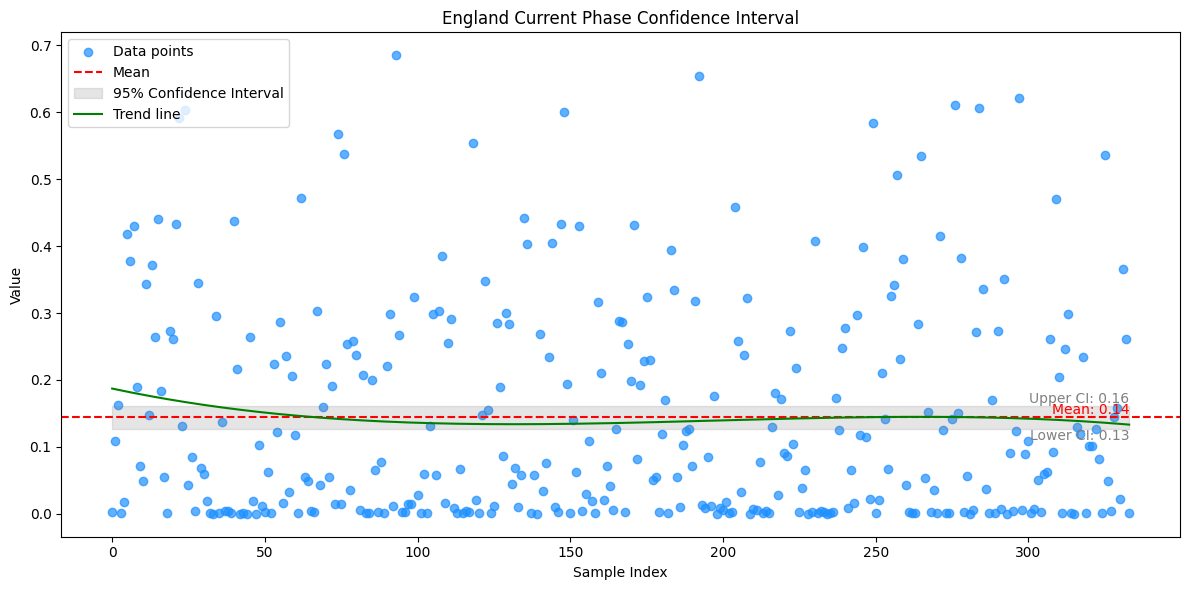

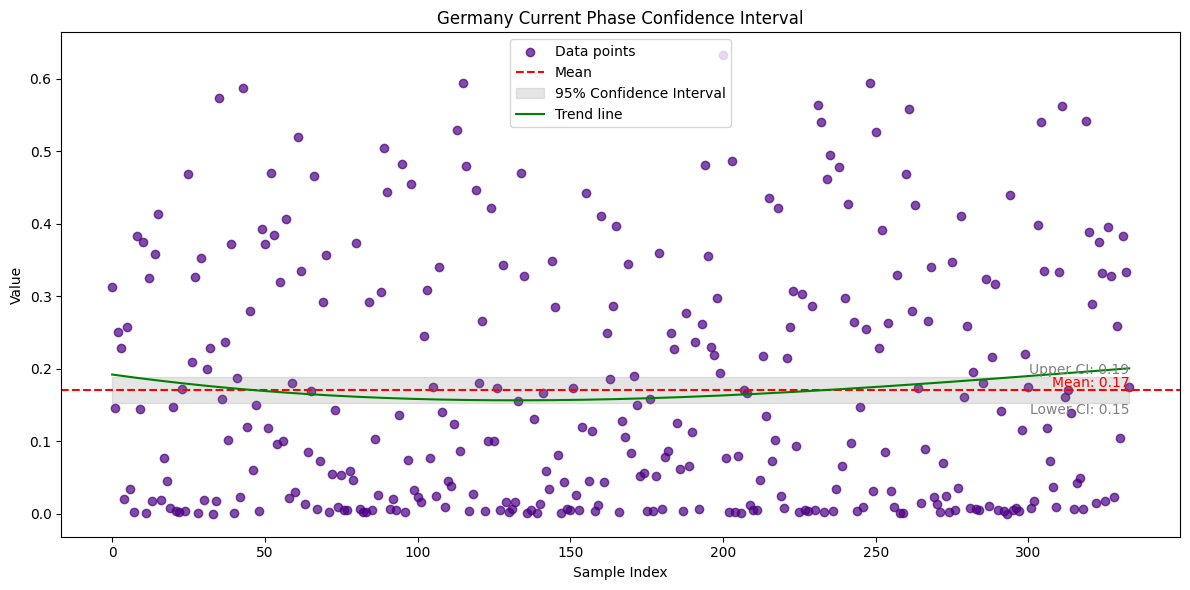

In [105]:
# Call the function to plot
plot_confidence_interval(c1_current_phase, c1, f"{c1} Current Phase Confidence Interval")
plot_confidence_interval(c2_current_phase, c2, f"{c2} Current Phase Confidence Interval")

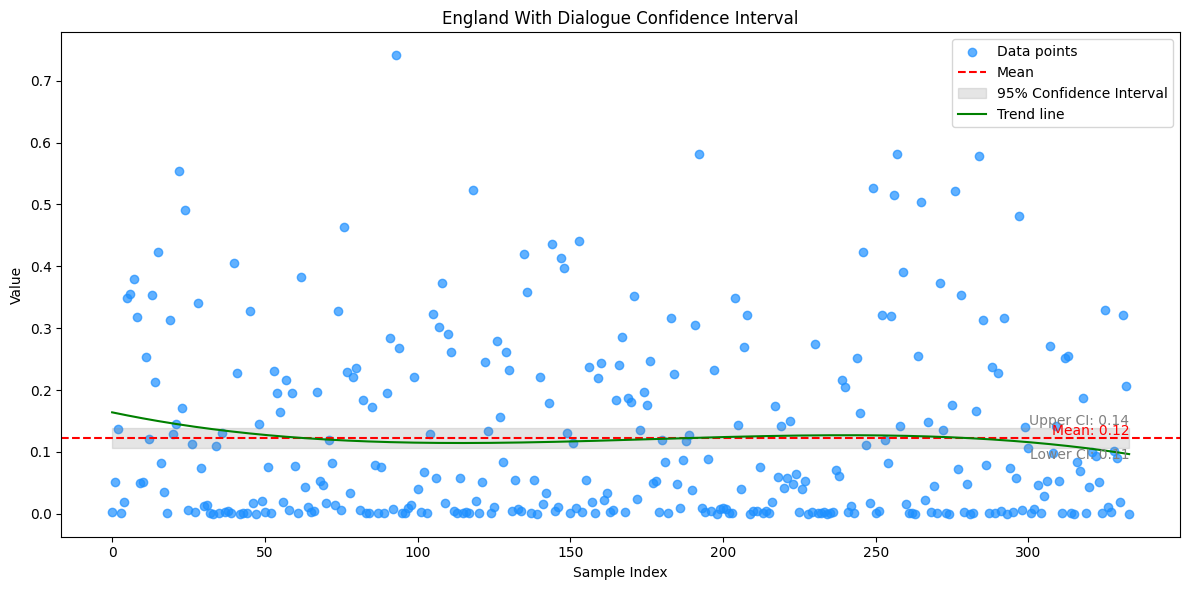

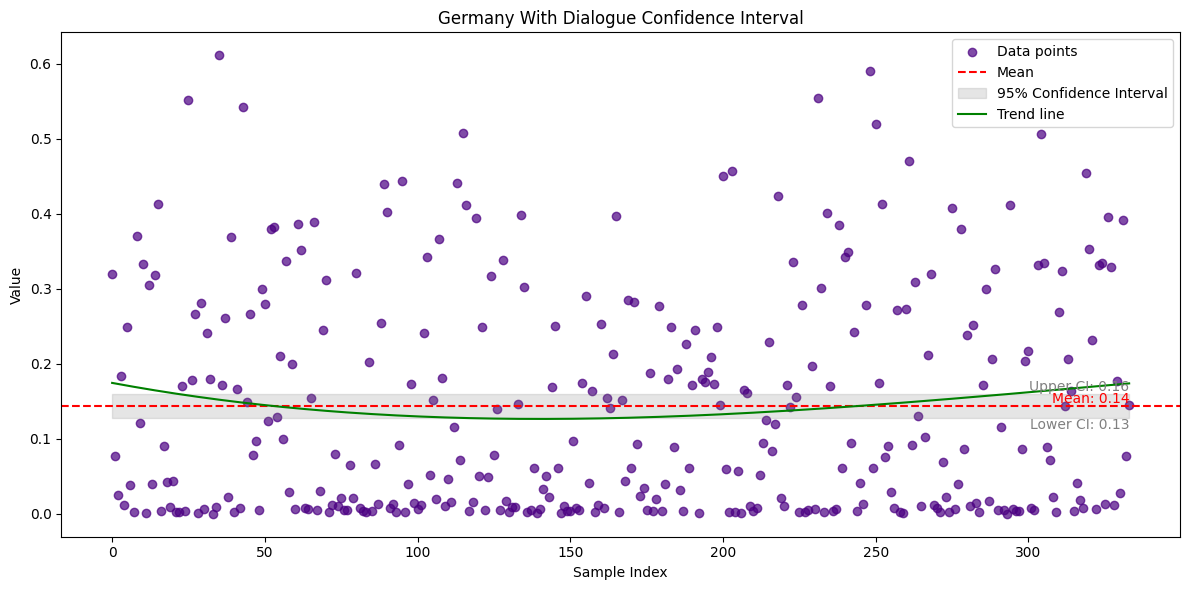

In [107]:
plot_confidence_interval(c1_with_dialogue, c1, f"{c1} With Dialogue Confidence Interval")
plot_confidence_interval(c2_with_dialogue, c2, f"{c2} With Dialogue Confidence Interval")

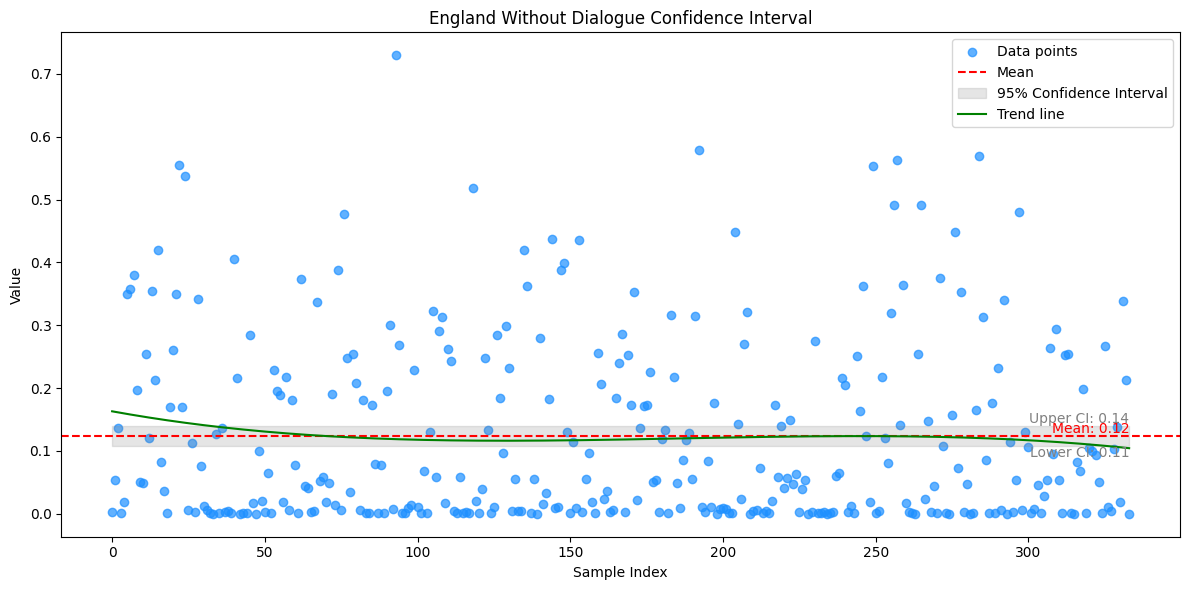

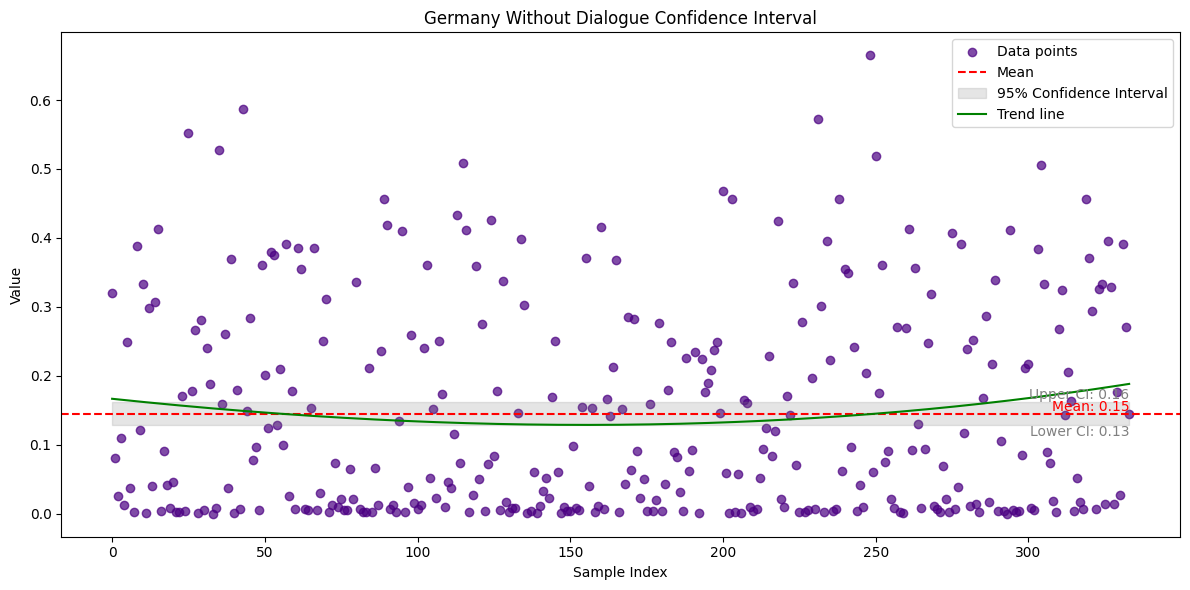

In [108]:
plot_confidence_interval(c1_without_dialogue, c1, f"{c1} Without Dialogue Confidence Interval")
plot_confidence_interval(c2_without_dialogue, c2, f"{c2} Without Dialogue Confidence Interval")

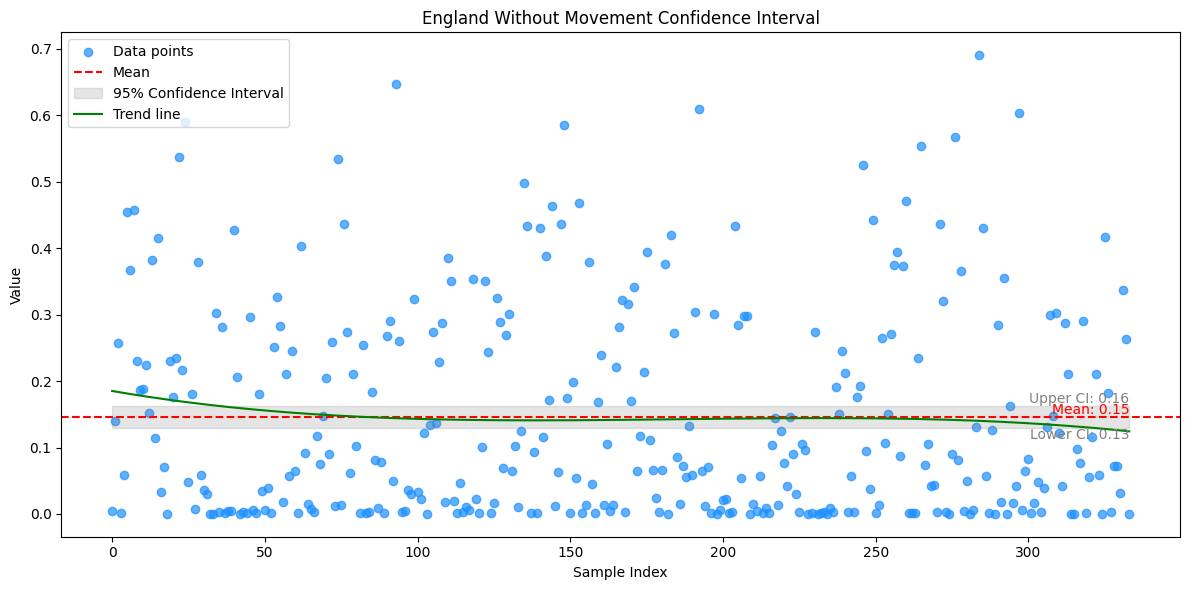

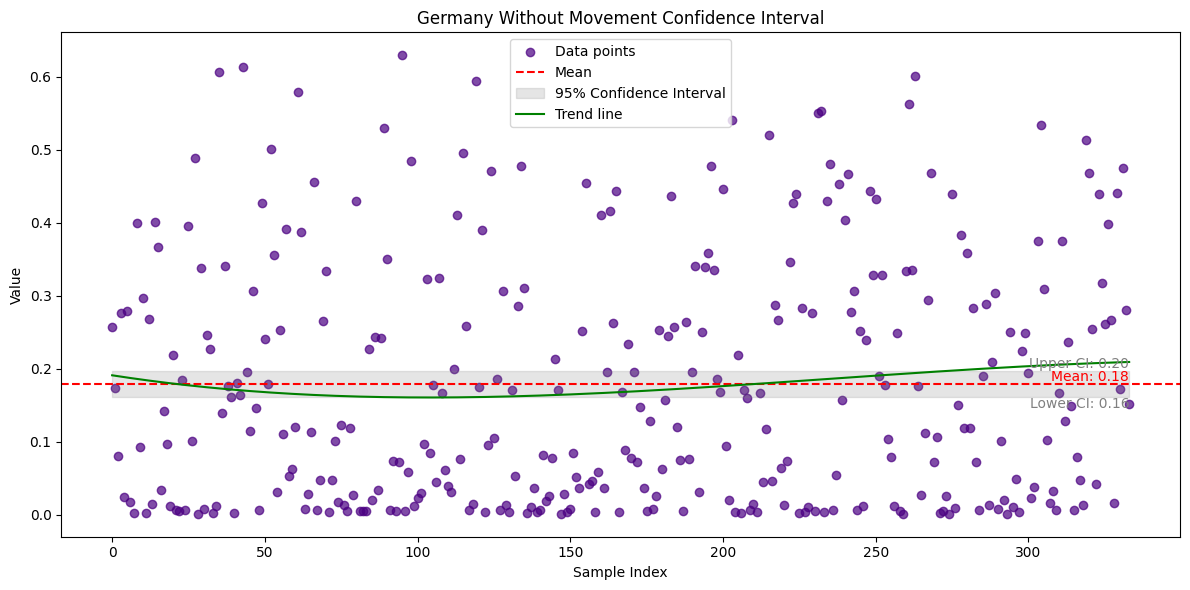

In [109]:
plot_confidence_interval(c1_without_movement, c1, f"{c1} Without Movement Confidence Interval")
plot_confidence_interval(c2_without_movement, c2, f"{c2} Without Movement Confidence Interval")

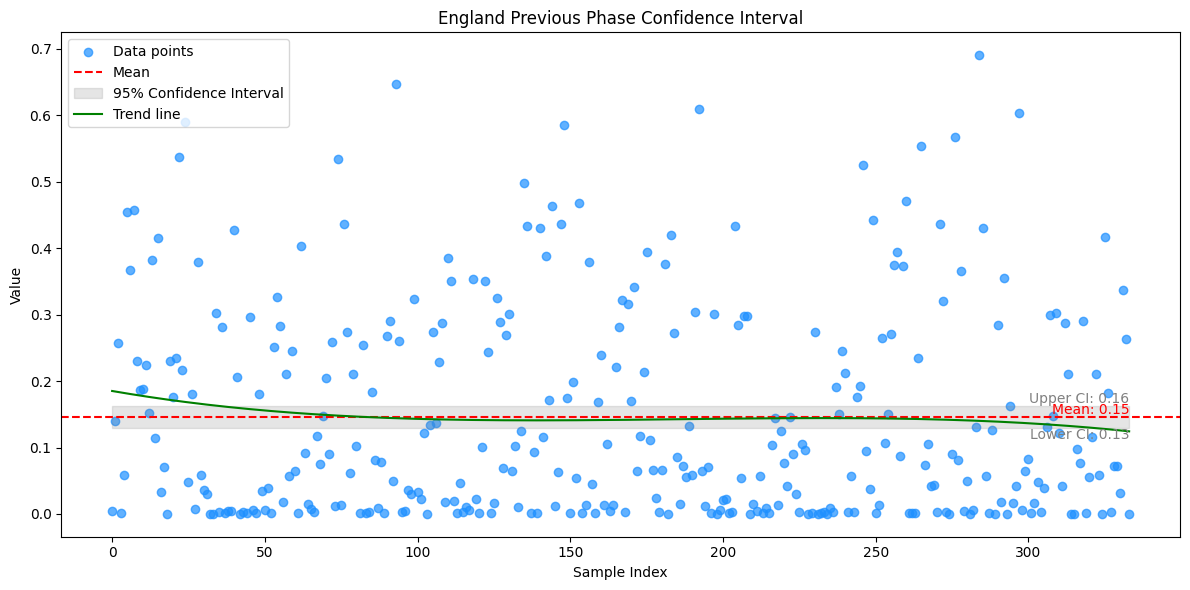

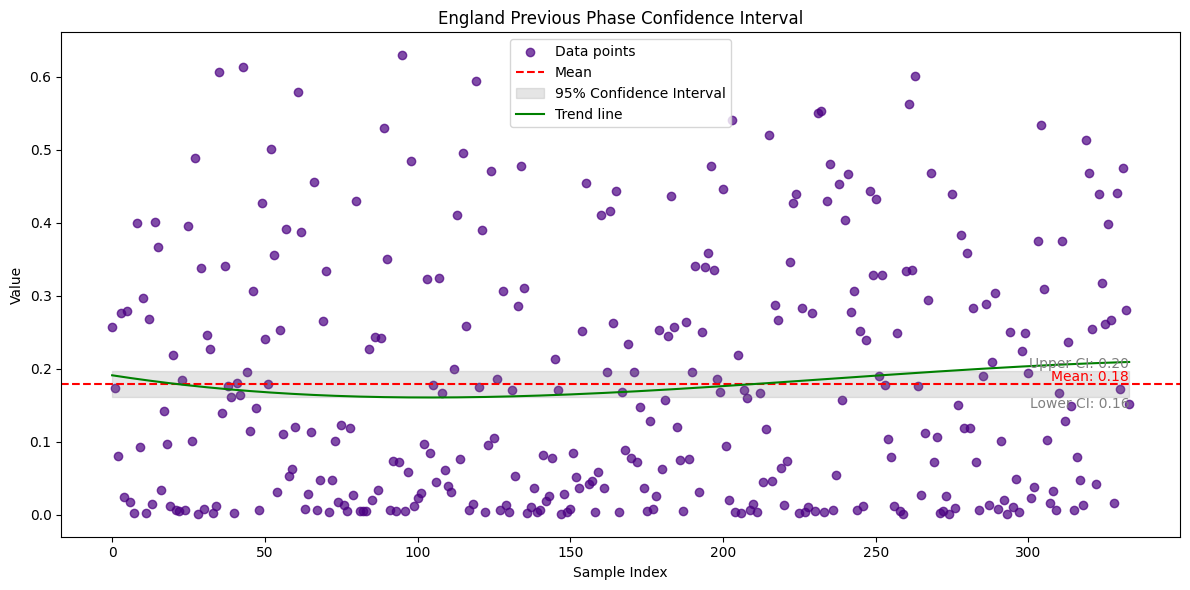

In [110]:
plot_confidence_interval(c1_previous_phase, c1, f"{c1} Previous Phase Confidence Interval")
plot_confidence_interval(c2_previous_phase, c2, f"{c1} Previous Phase Confidence Interval")

### Bootstrap

In [134]:
import numpy as np
from scipy import stats

def advanced_bootstrap(data, n_resamples=10000, confidence_level=0.95, random_state=None):
    """
    Perform advanced bootstrap analysis on a 1D array.

    Parameters:
    data (array-like): Input 1D array data
    n_resamples (int): Number of bootstrap resamples
    confidence_level (float): Confidence level, range (0, 1)
    random_state (int or None): Random seed for reproducibility

    Returns:
    dict: Dictionary containing bootstrap analysis results
    """
    
    def calculate_statistics(x, axis=0):
        return np.mean(x, axis=axis), np.median(x, axis=axis), np.std(x, axis=axis)

    result = stats.bootstrap(
        (data,),
        calculate_statistics,
        vectorized=False,
        n_resamples=n_resamples,
        confidence_level=confidence_level,
        random_state=random_state,
        method='percentile'
    )

    # Extract confidence intervals
    ci_low = result.confidence_interval.low
    ci_high = result.confidence_interval.high

    mean_ci = (ci_low[0], ci_high[0])
    median_ci = (ci_low[1], ci_high[1])
    std_ci = (ci_low[2], ci_high[2])

    # Estimate is the midpoint of the confidence interval
    mean_estimate = (mean_ci[0] + mean_ci[1]) / 2
    median_estimate = (median_ci[0] + median_ci[1]) / 2
    std_estimate = (std_ci[0] + std_ci[1]) / 2

    # Calculate standard error
    z_score = stats.norm.ppf((1 + confidence_level) / 2)
    se_mean = (mean_ci[1] - mean_ci[0]) / (2 * z_score)
    se_median = (median_ci[1] - median_ci[0]) / (2 * z_score)
    se_std = (std_ci[1] - std_ci[0]) / (2 * z_score)

    # Calculate bias
    original_mean = np.mean(data)
    original_median = np.median(data)
    original_std = np.std(data)

    return {
        "sample_size": len(data),
        "n_resamples": n_resamples,
        "confidence_level": confidence_level,
        "mean": {
            "estimate": mean_estimate,
            "ci": mean_ci,
            "se": se_mean,
            "bias": mean_estimate - original_mean
        },
        "median": {
            "estimate": median_estimate,
            "ci": median_ci,
            "se": se_median,
            "bias": median_estimate - original_median
        },
        "std": {
            "estimate": std_estimate,
            "ci": std_ci,
            "se": se_std,
            "bias": std_estimate - original_std
        }
    }



In [142]:
results = advanced_bootstrap(c2_previous_phase)

# Print results
print("Bootstrap Analysis Results:")
print(f"Sample size: {results['sample_size']}")
print(f"Number of bootstrap resamples: {results['n_resamples']}")
print(f"Confidence level: {results['confidence_level']:.2f}")

for stat in ['mean', 'median', 'std']:
    print(f"\n{stat.capitalize()}:")
    print(f"  Estimate: {results[stat]['estimate']:.4f}")
    print(f"  {results['confidence_level']*100:.0f}% Confidence Interval: "
          f"({results[stat]['ci'][0]:.4f}, {results[stat]['ci'][1]:.4f})")
    print(f"  Standard Error: {results[stat]['se']:.4f}")
    print(f"  Bias: {results[stat]['bias']:.4f}")

Bootstrap Analysis Results:

Sample size: 334

Number of bootstrap resamples: 10000

Confidence level: 0.95

Mean:

Estimate: 0.1786

95% Confidence Interval: (0.1607, 0.1965)

Standard Error: 0.0091

Bias: 0.0000

Median:

Estimate: 0.1362

95% Confidence Interval: (0.1015, 0.1709)

Standard Error: 0.0177

Bias: 0.0022

Std:

Estimate: 0.1671

95% Confidence Interval: (0.1564, 0.1778)

Standard Error: 0.0055

Bias: -0.0004

In [146]:
def calculate_overall_average(list1, list2):
    combined_list = list1 + list2
    total_sum = sum(combined_list)
    count = len(combined_list)
    average = total_sum / count
    return average

In [151]:
current_phase_value = calculate_overall_average(c1_current_phase, c2_current_phase)
with_dialogue = calculate_overall_average(c1_with_dialogue, c2_with_dialogue)
without_dialogue = calculate_overall_average(c1_without_dialogue, c2_without_dialogue)
without_movement = calculate_overall_average(c1_without_movement, c2_without_movement)
previous_phase = calculate_overall_average(c1_previous_phase, c2_previous_phase)

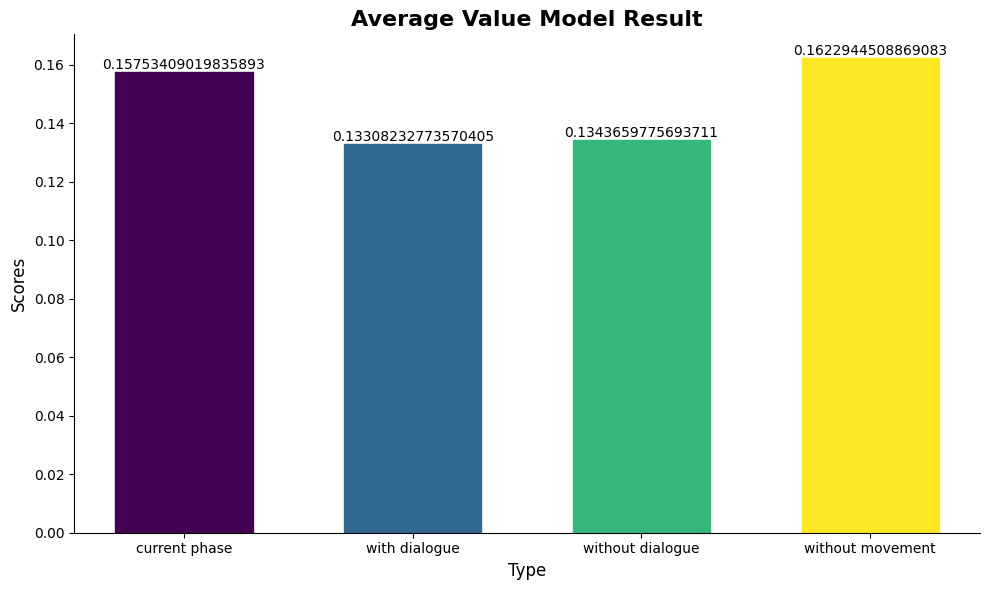

In [156]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['current phase', 'with dialogue', 'without dialogue', 'without movement']
values = [current_phase_value, with_dialogue, without_dialogue, without_movement]

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(labels, values, width=0.6)

colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))
for bar, color in zip(bars, colors):
    bar.set_color(color)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height}',
            ha='center', va='bottom')

ax.set_title('Average Value Model Result', fontsize=16, fontweight='bold')
ax.set_xlabel('Type', fontsize=12)
ax.set_ylabel('Scores', fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# ax.yaxis.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()